240104: Have installed things, environment is LiLab. Can see SG386, NIFPGA, and PulseStreamer. Need to now integrate them into one system to see some ODMR Now.

In [27]:
import numpy as np
import time
import scipy
import matplotlib.pyplot as plt
import tqdm
import pulsestreamer
import nifpga
import pyvisa
import serial
import io
from importlib import reload
import systemFunctions
reload(systemFunctions)

<module 'systemFunctions' from 'c:\\Users\\Li_Lab_B12\\Desktop\\DataSumukh\\250731_PythonCode\\systemFunctions.py'>

In [23]:
#### FPGA Bitfile to use for the ODMR
# bitfile_loc="C:/NDController-ver2/FPGA Bitfiles/everythingdaq_FPGATarget2_FPGAESRver5_RELKYtnkXk4.lvbitx"

# #### Give the different pulse parameters
# aomvolt=0.6 # !!! In VOLTS, ONLY 0-1V
# pulsenum=5000 
# countt=.05*1e6 # Durations in ms ONLY, then converted to ns
# separationt=.03*1e6 # Durations in ms ONLY, then converted to ns
# addlt=.003*1e6 # Durations in ms ONLY, then converted to ns
# waitt=.003*1e6 # Durations in ms ONLY, then converted to ns
# mw_freq = 3.1e9 # Hz
# mw_power=-5 # dBm

# # #### Connect to Pulsestreamer and setup the pulses
# pulsestreamer_ip='169.254.8.2'
# ps=pulsestreamer.PulseStreamer(pulsestreamer_ip)
# ps.reset()
# aompatt=[(96,aomvolt)] # AOM analog modulation voltage, use to control 532nm laser power
# ch0patt=[(96,1)] # Keep the laser always ON for CW ODMR
# ch1patt=[(waitt,1), (countt,1), (addlt,1),(waitt,0), (countt,0), (addlt,0),(separationt,0)]  # Microwave
# ch2patt=[(waitt,0), (countt,1), (addlt,0),(waitt,0), (countt,1), (addlt,0),(separationt,0)]  # Counting
# seq=ps.createSequence()
# seq.setAnalog(0,aompatt)
# seq.setDigital(0,ch0patt)
# seq.setDigital(1,ch1patt)
# seq.setDigital(2,ch2patt)
# seq.plot()


# # #### Open and configure the SG386
# rm=pyvisa.ResourceManager()
# device_list =   'potato'
# # device_list=rm.list_resources()
# print(device_list)
# sg386=rm.open_resource('GPIB0::27::INSTR')
# print(sg386)
# print(sg386.query('*IDN?'))
# # # print(sg386.query('TIMB?'))
# # sg386.write('FREQ '+str(mw_freq))
# print(sg386.query('FREQ?'))

# sg386.write('AMPR '+str(mw_power) )
# print(sg386.query('AMPR?'))
# sg386.write('ENBR 1')
# print(sg386.query('ENBR?'))
# sg386.close()

## Open and configure the Piezo Controller
# piezo=serial.Serial('COM4',115200,timeout=1)
# # piezo.write("id?")
# # print(piezo.read(10))
# piezo.close()

# for device in device_list:
#     try:
#         instrument=rm.open_resource(device)
#         print(instrument)
#         print(instrument.query('*IDN?'))
#         instrument.close()
#     except:
#         continue

### Connect to FPGA and read the FIFO Buffer
# def getContrast(freq):
#     with nifpga.Session(bitfile=bitfile_loc, resource="RIO0") as session:
#         sg386.write('FREQ '+str(freq))
#         # print(sg386.query('FREQ?'))
#         session.reset()
#         session.run()
#         target2host=session.fifos['FIFO_target2host']
#         target2host.configure(pulsenum)
#         target2host.start()
#         ps.stream(seq,n_runs=int(pulsenum/2))
#         # print(target2host.name)
#         read_value = target2host.read(pulsenum,1000)
#         target2host.stop()

#         counts=read_value[0]
#         contrast=sum(counts[0::2])/sum(counts[1::2])

#     return contrast


In [11]:
# print(len(read_value[0]))
# counts=read_value[0]
# # sume=0
# contrast=sum(counts[0::2])/sum(counts[1::2])
# print(getContrast(3.1e9))

# freqs=np.linspace(1.5e9,2.1e9,61)
# contrast=np.zeros(len(freqs))
# for i in tqdm.tqdm(range(len(freqs))):
#     contrast[i]=getContrast(freqs[i])

# plt.figure(1)
# plt.plot(freqs, contrast, linewidth=2)
# plt.xlabel('Frequency (Hz)',fontsize=16)
# plt.ylabel('Contrast',fontsize=16)
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)


  0%|          | 0/51 [00:00<?, ?it/s]

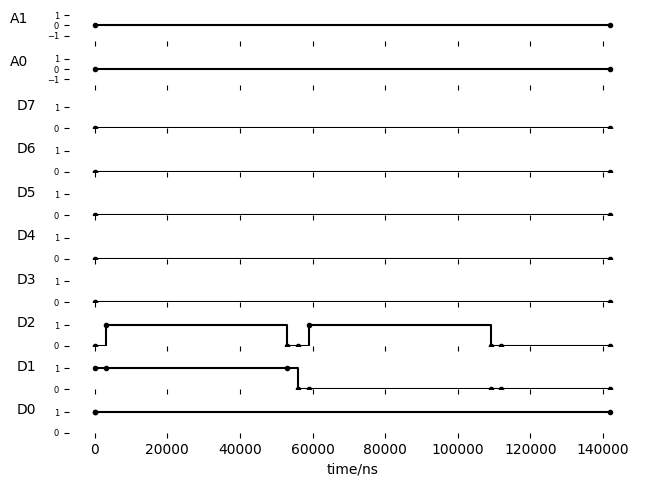

100%|██████████| 51/51 [00:44<00:00,  1.15it/s]


(array([0.9 , 0.92, 0.94, 0.96, 0.98, 1.  , 1.02]),
 [Text(0, 0.9, '0.90'),
  Text(0, 0.92, '0.92'),
  Text(0, 0.9400000000000001, '0.94'),
  Text(0, 0.96, '0.96'),
  Text(0, 0.98, '0.98'),
  Text(0, 1.0, '1.00'),
  Text(0, 1.02, '1.02')])

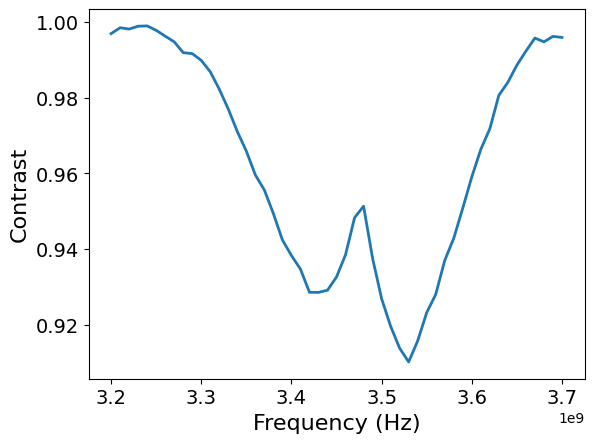

In [29]:
# aomvolt=0.6 # !!! In VOLTS, ONLY 0-1V
# pulsenum=5000 
# countt=.05*1e6 # Durations in ms ONLY, then converted to ns
# separationt=.03*1e6 # Durations in ms ONLY, then converted to ns
# addlt=.003*1e6 # Durations in ms ONLY, then converted to ns
# waitt=.003*1e6 # Durations in ms ONLY, then converted to ns
# mw_freq = 3.1e9 # Hz
# mw_power=-5 # dBm

config={'aomvolt':0.5,
        'pulsenum':10000,
        'count_t':.05*1e6,
        'separation_t':.03*1e6,
        'addl_t':.003*1e6,
        'wait_t':.003*1e6,
        'freq':1.85e9,
        'mw_power':-10,
        'seqplot':True}

freqs=np.linspace(3.2e9,3.7e9,51)
# freqs=[1.85e9]
contrast=np.zeros(len(freqs))
mw_off=np.zeros(len(freqs))
mw_on=np.zeros(len(freqs))
for i in tqdm.tqdm(range(len(freqs))):
    config['freq']=freqs[i]
    if i==0: config['seqplot']=True
    if i!=0: config['seqplot']=False
    ODMRdata=systemFunctions.getODMRContrast(config)
    contrast[i]=ODMRdata[0]
    mw_on[i]=ODMRdata[1]
    mw_off[i]=ODMRdata[2]

# print(contrast)
plt.figure(1)
plt.plot(freqs, contrast, linewidth=2)
plt.xlabel('Frequency (Hz)',fontsize=16)
plt.ylabel('Contrast',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


<Figure size 640x480 with 0 Axes>

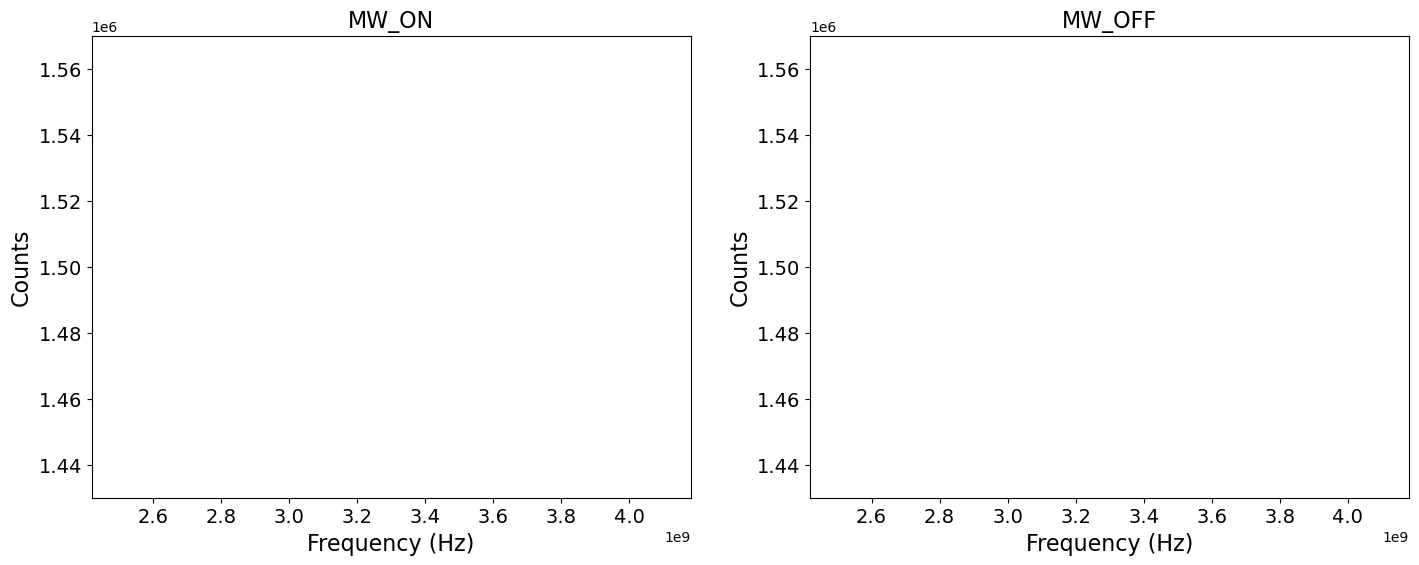

In [ ]:
plt.figure(2)
f, axs = plt.subplots(2, 2, figsize=(17, 6))
plt.subplot(1,2,1)
plt.plot(freqs,mw_on, linewidth=2)
plt.xlabel('Frequency (Hz)',fontsize=16)
plt.ylabel('Counts',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim([1.43e6,1.57e6])
plt.title("MW_ON",fontsize=16)

plt.subplot(1,2,2)
plt.plot(freqs,mw_off, linewidth=2)
plt.xlabel('Frequency (Hz)',fontsize=16)
plt.ylabel('Counts',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim([1.43e6,1.57e6])
plt.title("MW_OFF",fontsize=16)

plt.show()



  0%|          | 0/101 [00:00<?, ?it/s]

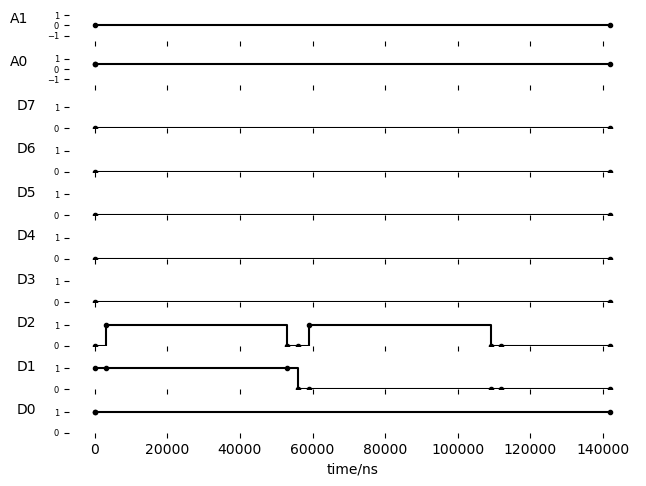

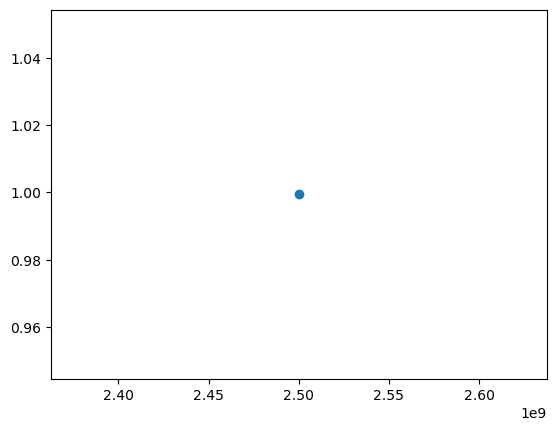

  1%|          | 1/101 [00:01<03:09,  1.89s/it]

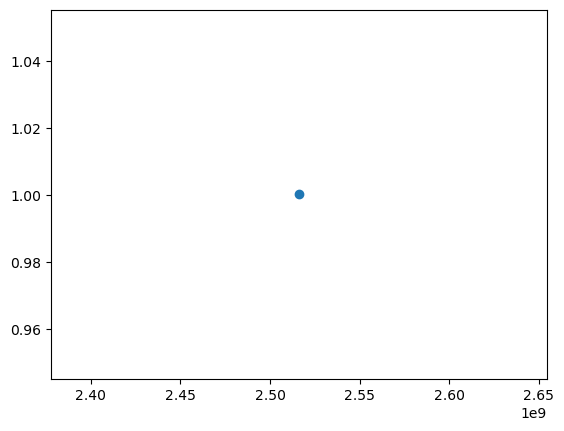

  2%|▏         | 2/101 [00:02<02:16,  1.38s/it]

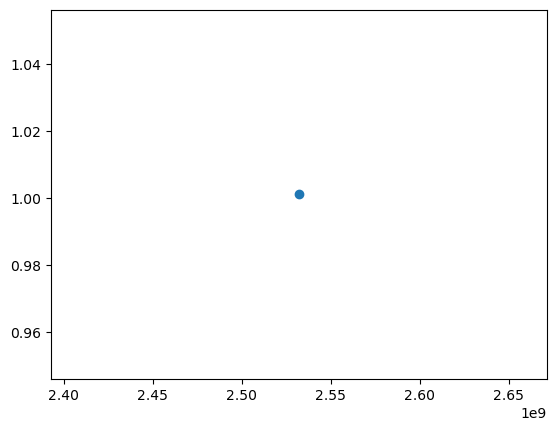

  3%|▎         | 3/101 [00:03<01:57,  1.20s/it]

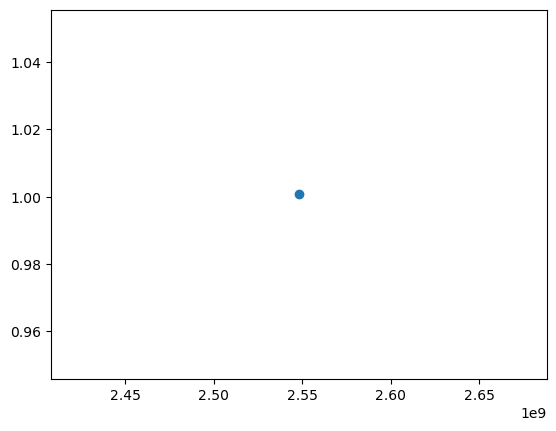

  4%|▍         | 4/101 [00:04<01:50,  1.14s/it]

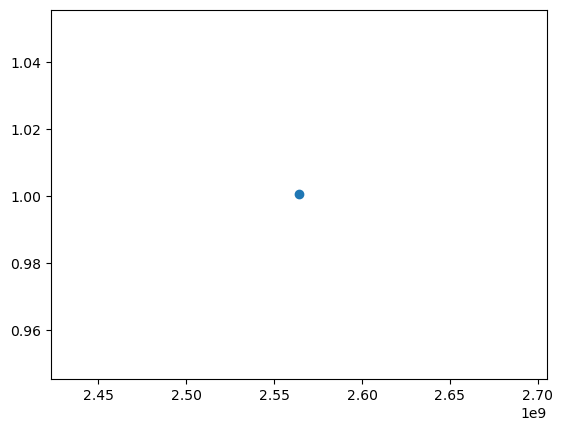

  5%|▍         | 5/101 [00:06<02:11,  1.37s/it]


KeyboardInterrupt: 

In [ ]:
# This is for repeated ODMR experiments, averaging out each run

config={'aomvolt':0.5,
        'pulsenum':10000,
        'count_t':.05*1e6,
        'separation_t':.03*1e6,
        'addl_t':.003*1e6,
        'wait_t':.003*1e6,
        'freq':1.85e9,
        'mw_power':-9,
        'seqplot':True}

experiments = 60;

freqs=np.linspace(2.5e9,4.1e9,101)
# freqs=[1.85e9]
contrast=np.zeros(len(freqs))
mw_off=np.zeros(len(freqs))
mw_on=np.zeros(len(freqs))

for i in tqdm.tqdm(range(len(freqs))):
    config['freq']=freqs[i]
    if i==0: config['seqplot']=True
    if i!=0: config['seqplot']=False
    ODMRdata=systemFunctions.getODMRContrast(config)
    contrast[i]=ODMRdata[0]
    mw_on[i]=ODMRdata[1]
    mw_off[i]=ODMRdata[2]

    plt.draw(freqs[i], contrast[i])
    plt.pause(0.05)
   

#print(contrast)
plt.figure(1)
plt.plot(freqs, contrast, linewidth=2)
plt.xlabel('Frequency (Hz)',fontsize=16)
plt.ylabel('Contrast',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

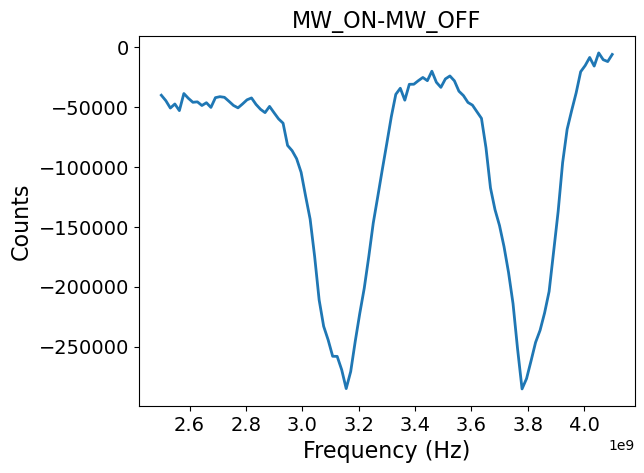

In [ ]:
# plt.subplot(1,2,2)
plt.plot(freqs,mw_on-mw_off, linewidth=2)
plt.xlabel('Frequency (Hz)',fontsize=16)
plt.ylabel('Counts',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.ylim([1.43e6,1.57e6])
plt.title("MW_ON-MW_OFF",fontsize=16)

plt.show()
